In [144]:
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.signal import *
import matplotlib.pyplot as plt
import cv2
import scipy
from functions import *

In [143]:
from importlib import reload  

In [71]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [142]:
reload(functions)

<module 'functions' from '/Users/kevinmiao/Desktop/CS194/inst.eecs.berkeley.edu/~cs194-26/fa20/hw/proj2/functions.py'>

# Project 2

Code by: Kevin Miao (3033056028)
*CS194 - Fall 2020*

This notebook can be used for handling, utilizing the code to reproduce or create results applying on certain images.

This notebook contains the infrastructure for the following tasks:
- Edge Detection (Threshold)
- Edge Detection (Gaussian Blur)
- Image Straightening
- Image Sharpening
- Image Hybridization
- Fourier Analysis
- Multi Resolution Blending

## Edge Detection

### `Threshold`

### `Gaussian Blur`

## Straightening

## Sharpening

## Hybridization & Fourier

In [19]:
sahai = skio.imread("anantsahai.jpg", as_gray=True)
rao = skio.imread("satishrao.jpg", as_gray=True)

Please select 2 points in each image for alignment.


/Users/kevinmiao/opt/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/Users/kevinmiao/Desktop/CS194/inst.eecs.berkeley.edu/~cs194-26/fa20/hw/proj2/functions.py:328: RuntimeWarning: divide by zero encountered in log
  fourier += [np.log(np.abs(np.fft.fftshift(np.fft.fft2(blur))))]
/Users/kevinmiao/Desktop/CS194/inst.eecs.berkeley.edu/~cs194-26/fa20/hw/proj2/functions.py:329: RuntimeWarning: divide by zero encountered in log
  else:


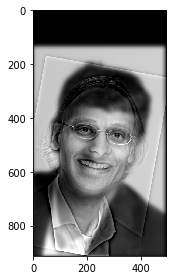

In [145]:
sarao, f, lh = hybrid_images_fourier('anantsahai.jpg', 'satishrao.jpg', 7,7, debug=True)

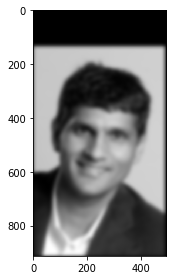

In [146]:
skio.imshow(lh[0])

/Users/kevinmiao/opt/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


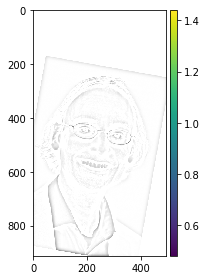

In [148]:
skio.imshow(1-lh[1])

In [48]:
skio.imsave('outputs/sarao.jpeg', sarao)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


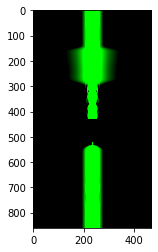

In [77]:
plt.imshow(f[1])

## Multi Resolution Blending

In [133]:
vien = skio.imread('vienna.JPG')/255
country = skio.imread('country.JPG')/255

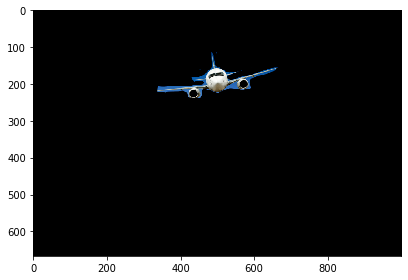

In [122]:
skio.imshow(mask *country)

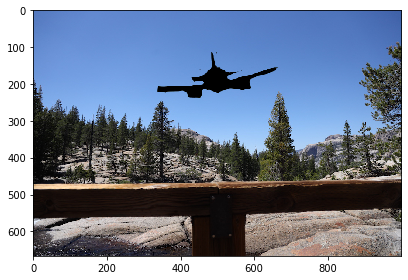

In [123]:
skio.imshow((1-mask) * vien)

In [124]:
country.shape

(667, 1000, 3)

In [125]:
mask.shape

(667, 1000, 3)

In [134]:
horizontal_seam_y = 130
mask = np.zeros(vien.shape)
mask[-horizontal_seam_y:,:, :] = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


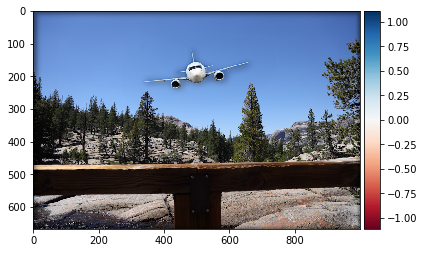

In [131]:
skio.imshow(multi_resolution_blending(vien, country, 1-mask, 3, 10))

In [135]:
skio.imsave("outputs/bettervienamerica.jpg",np.clip(multi_resolution_blending(vien, country, mask, 3, 10), a_min=0, a_max=1 ))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
